## Language Identification Challenge

### By **Moses Ubaku**

## Description
South Africa is a multicultural society that is characterised by its rich linguistic diversity. In This challenge we will take text in any of the 11 official languages and train our classification model to understand which languge the text is in.


In [108]:
#importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [109]:
stopwords_list = stopwords.words('english')

In [110]:
#Read data
train_set = pd.read_csv('train_set.csv')
test_set = pd.read_csv('test_set.csv')

In [111]:
train_set.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [112]:
train_set.iloc[400]['text']

'nanome bavuma babuye bahlonipha lilungelo lelicembu lelibusako kutsi lilungise tindzaba talo bakhatsatekile kutsi kumele lichubeke nekudlala indzima yalo njengebasunguli labakhulu beningizimu afrika yentsandvo yelinyenti lengavuni buhlanga lengavuni bulili nalenenchubekelembili'

In [113]:
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))

def clean_text(x):
    """
        text: a string
        
        return: modified initial string
    """
    x = re.sub(r'[/(){}\[\]\|@,;]',' ',x)
    x = re.sub(r'[^0-9a-z #+_]',' ',x)
    x = re.sub(r'[-]',' ',x)
    x = re.sub(r'[_]', ' ', x)
    x = re.sub(r'[^\w\s]','',x)
    x = re.sub('[0-9]+', '', x)
    x = re.sub(r'[^\x00-\x7f]',r'', x)
    x = ' '.join(word for word in x.split() if word not in stopwords_list)
    return x
    
train_set['text'] = train_set['text'].apply(clean_text)
test_set['text'] = test_set['text'].apply(clean_text)

In [114]:
train_set.shape

(33000, 2)

In [115]:
test_set.head(10)

,index,text
0,1,masepala fa maemo kgethegileng letlelela kgato eo
1,2,zakwaziswa ngokufaneleko nakungafuneka eminye ...
2,3,shivhumbeo tshi fana na ngano dza vhathu
3,4,ube inja nelikati betingevakala kutsi titsini ...
4,5,inste op buitelandse valuta
5,6,e feela dilense e hlakilego pono e tee goba e ...
6,7,fn inal ems irthing ptions txt fn
7,8,tjhafatso ya konteraka ya mosebetsi tsa bonnet...
8,9,u uhlinzeka ngezinzuzo zemithi yezifo ezingaph...
9,10,occasion statistics misused


Lets check if there are null values in the dataset

In [116]:
train_set.isnull().sum()

lang_id    0
text       0
dtype: int64

In [117]:
test_set.isnull().sum()

index    0
text     0
dtype: int64

Now we have to split the training data set into featueres and response 

In [249]:
X_train = train_set['text']

y_train = train_set['lang_id']

Lets then check how many unique languages are available here

In [250]:
# retrurn a list of unique lang_id
list(y_train.unique())


['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']

Next lets plot the spread of the languages

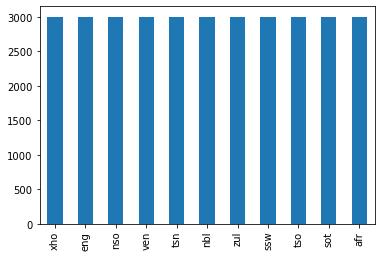

In [251]:
y_train.value_counts().plot(kind = 'bar')
plt.show()

We seem to have a very balanced data set

Now we will use **CountVectorizer** to tranform text to numbers

In [252]:
#Lets tokenize the words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

We want to check our training outcome first by using test set from our training data

In [253]:
encod = LabelEncoder()
y_train= encod.fit_transform(y_train)

reverse = list(encod.classes_)


In [233]:
#IGNORE THESE COMMENTS

#vect = CountVectorizer(max_features=25)
#x_fit = vect.fit_transform(X_train.values.astype(str))
#X_train_ = x_fit.toarray()

#could us TfidfTransformer to convert CountVectorizer output to Tfid metrics, but would produce a poorer prediction
#tf = TfidfTransformer(norm='l2')


X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train,  test_size = 0.2, random_state=42)


tf = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')
X_train_ = tf.fit_transform(X_train_)


lreg = LogisticRegression(multi_class='ovr', max_iter = 1000, solver = 'sag')
lreg.fit(X_train_, y_train_)


#testset transformation

X_test_ = tf.transform(X_test_)
y_pred = lreg.predict(X_test_)

print(accuracy_score(y_test_, y_pred))
#print(classification_report(y_test_, y_pred))


0.9981818181818182


In [254]:
X_train_.shape

(33000, 337756)

We achieve great performance here. 
Lets then fit our test to this Logistic regression

In [255]:
#result = encod.inverse_transform(reverse)
reverse

['afr', 'eng', 'nbl', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven', 'xho', 'zul']

Its already obvious that we now have way to many features so we would have to tream that to only 25 and tweaking some parameters

In [256]:
#IGNORE THESE COMMENTS
#Esstimator for StackingClassifier

#Mnomia = MultinomialNB(alpha = 0.1 )
#svc = SVC()
lreg = LogisticRegression(multi_class='ovr', max_iter = 1000, solver = 'sag')



In [257]:
#IGNORE THESE COMMENTS
#cv = KFold(n_splits = 10)

In [258]:
#IGNORE THESE COMMENTS

#vectorize = CountVectorizer(max_features=25)
#x_fit = vectorize.fit_transform(X_train.values.astype(str))

#features = vectorize.get_feature_names_out()

#X_train = x_fit.toarray()


In [259]:
"""
    parameter = {'kernel': ('linear', 'rbf'),
                 'C': (0.1, 0.2),
                'gamma' : (1,2)
                }

    svg_grid = GridSearchCV(esimator = svc, 
                            param_grid = parameter, 
                            scoring = 'f1_weighted', 
                            n_jobs = -1, 
                            error_score = 0,
                            cv = cv)

    estimator =[('Binomial', Mnomia), ('svg', svg_grid)]

    final_est = lreg
"""

"\n    parameter = {'kernel': ('linear', 'rbf'),\n                 'C': (0.1, 0.2),\n                'gamma' : (1,2)\n                }\n\n    svg_grid = GridSearchCV(esimator = svc, \n                            param_grid = parameter, \n                            scoring = 'f1_weighted', \n                            n_jobs = -1, \n                            error_score = 0,\n                            cv = cv)\n\n    estimator =[('Binomial', Mnomia), ('svg', svg_grid)]\n\n    final_est = lreg\n"

In [260]:
#stackingClf = StackingClassifier(estimators = estimator, final_estimator = final_est, passthrough = True)

In [262]:
#tf = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')
#X_train = tf.fit_transform(X_train)

vect = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')
X_train = vect.fit_transform(X_train)

In [263]:
X_train.shape

(33000, 337756)

In [264]:
y_train.shape

(33000,)

Lets go ahaed and transform the test data as well

In [265]:
X_test = test_set['text']
y_test = test_set['index']


X_test = vect.transform(X_test)


In [266]:
X_test.shape

(5682, 337756)

In [267]:
#IGNORE THIS COMMENT
#stackingClf.fit(X_train, y_train)

#y_pred = stackingClf.predict(X_test)

In [268]:
lreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', solver='sag')

In [269]:
y_pred = lreg.predict(X_test)

In [270]:
print(accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred))
y_pred.shape

0.00017599436818021823


(5682,)

Now let revert the result from numbers to their respective string ['lang_id']

In [271]:
y_pred = encod.inverse_transform(y_pred)
y_pred

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'nbl'], dtype=object)

In [272]:
test_set['lang_id'] = y_pred

In [273]:
submission = test_set[['index','lang_id']]

In [274]:
submission.to_csv('submission.csv', index = False)